In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Week#4 Q&A Activity

Carry out Visualization for the following questions:

 1.  Compare churn count with respect to gender.
 2.  Find out how many female senior citizens there in the dataset
 3.  Compare 'tenure' with 'Total Charges'
 4.  Find out which contract preffered by the senior citizen.
 5.  Comment on your finds on Payment Method?

In [5]:
tel= pd.read_excel('Telco-Customer-Churn.xlsx')## READING DATASET.

In [8]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1.Compare churn count with respect to gender

In [10]:
gender_count=pd.crosstab(index=tel['gender'],columns=tel['Churn'])
gender_count

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


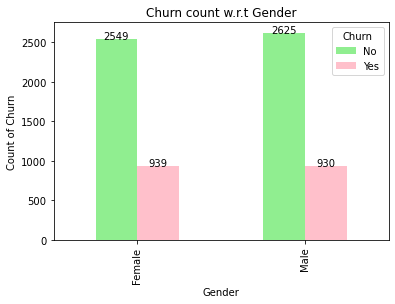

In [11]:
graph = gender_count.plot.bar(color=['lightgreen','pink'])
plt.xlabel("Gender")
plt.ylabel("Count of Churn")
plt.title("Churn count w.r.t Gender")
i=0
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.5,
            height, ha="center")
        i += 1

### INFERENCES:
  From the above graph we can see that the churn count of female subscribers are more than that of male churn count. But even though there is still a significant number males and females who are still using the service

### 2. Finding out how many female senior citizens there in the dataset.

In [12]:
tel[(tel['SeniorCitizen']==1) & (tel['gender']=='Female')].shape[0]

568

### 3.Compare tenure with total charges

In [13]:
tel.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [63]:
tel ['TotalCharges'] = pd.to_numeric(tel['TotalCharges'], errors='coerce')## changing datatyped of total charges.


In [16]:
tel["TotalCharges"].fillna(tel["TotalCharges"].mean(),inplace = True)

In [19]:
tel.info()## total charges type changed into float from object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
tel.loc[:,['tenure', 'TotalCharges']]

,tenure,TotalCharges
0,1,29.85
1,34,1889.50
2,2,108.15
3,45,1840.75
4,2,151.65
...,...,...
7038,24,1990.50
7039,72,7362.90
7040,11,346.45
7041,4,306.60


Text(0.5, 1.0, 'Plot of tenure vs total charges')

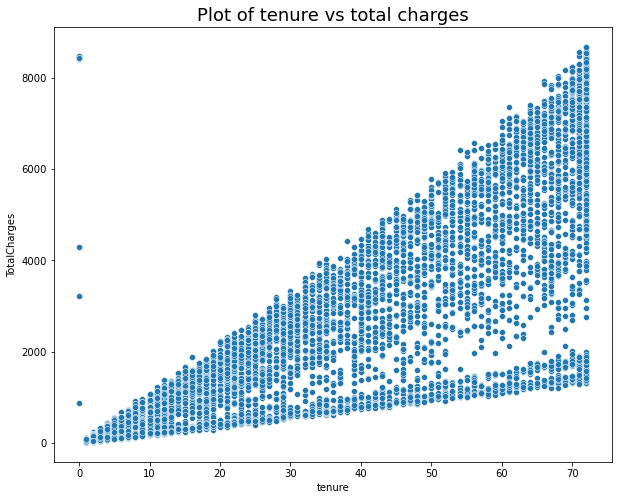

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='tenure',y='TotalCharges',data=tel)
plt.title('Plot of tenure vs total charges',fontsize=18)

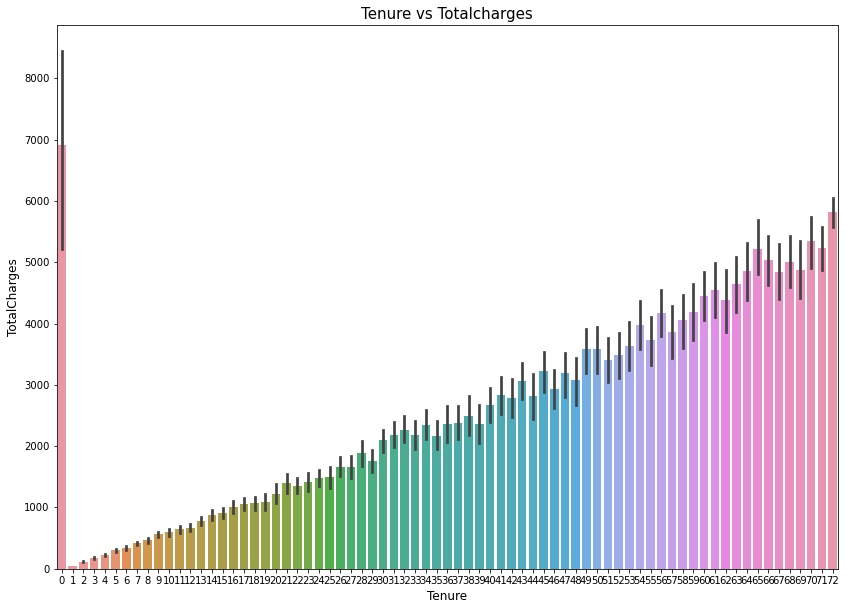

In [33]:
plt.figure(figsize=(14,10))
sns.barplot(x ='tenure',y ='TotalCharges',data = tel)
plt.title("Tenure vs Totalcharges",fontsize=15)
plt.xlabel("Tenure",fontsize=12)
plt.ylabel("TotalCharges",fontsize=12)
plt.show()

### 4. Find out which contract preffered by the senior citizen.

In [34]:
tel.loc[tel['SeniorCitizen']==1,['Contract']].value_counts().to_frame()

,0
Contract,
Month-to-month,807
One year,190
Two year,145


Text(0.5, 1.0, 'Contract preffered by senior citizen')

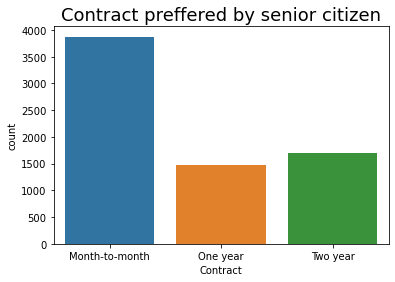

In [46]:
sns.countplot(x='Contract',data=tel)
plt.title('Contract preffered by senior citizen',fontsize=18)

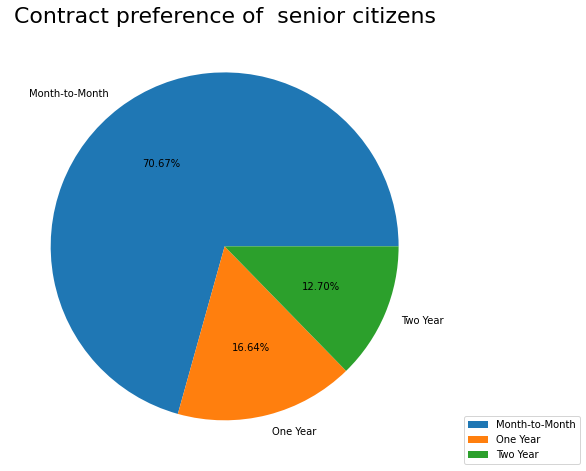

In [48]:
fig=plt.figure(figsize=(8,8))
labels=["Month-to-Month","One Year","Two Year"]
plt.pie(tel.loc[tel["SeniorCitizen"]==1,["Contract"]].value_counts(),autopct= "%1.2f%%",labels=labels)
plt.legend(loc=(1.05,0))
plt.title("Contract preference of  senior citizens",fontsize=22)
plt.show()

### INFERENCES:
     Mostly preferred contracts are month to month among senior citizens.

### 5.Comment on your finds on Payment Method?

In [50]:
(tel['PaymentMethod']).value_counts().to_frame()### finding no.of diff payment methods.

,PaymentMethod
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


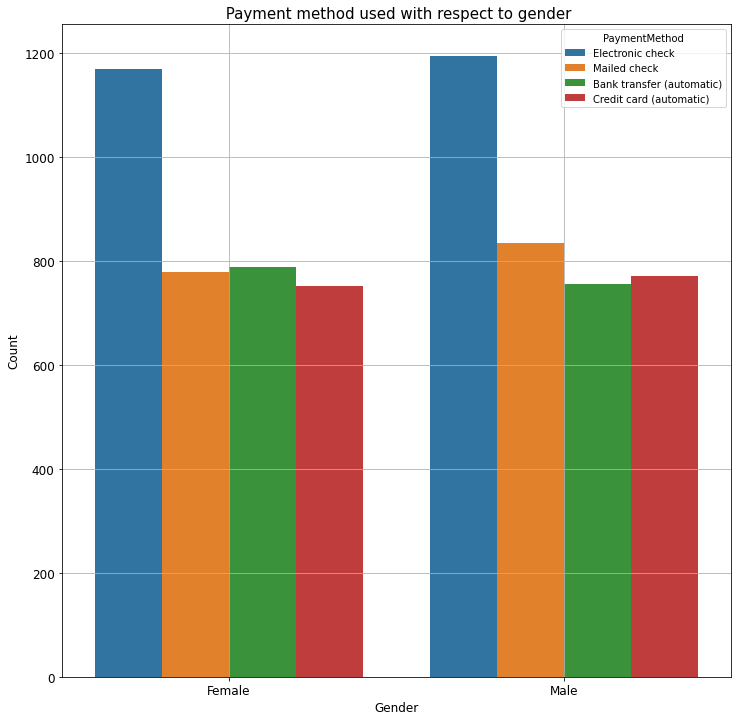

In [52]:
plt.figure(figsize= (12,12))
sns.countplot(x = "gender", hue = "PaymentMethod", data = tel)
plt.title(" Payment method used with respect to gender", fontsize = 15)
plt.xlabel("Gender", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()
plt.show()

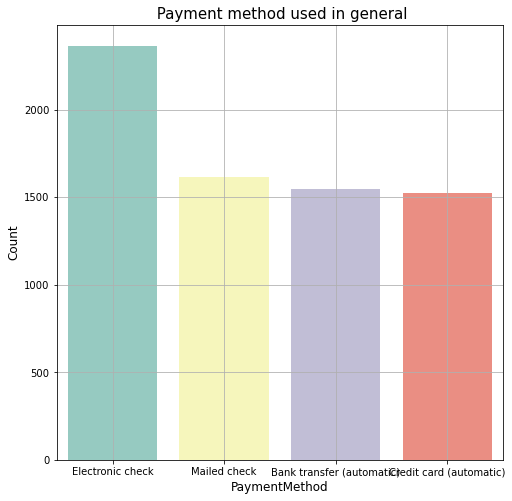

In [59]:
plt.figure(figsize=(8,8))
plt.title(" Payment method used in general",fontsize=15)
sns.countplot(tel['PaymentMethod'],palette="Set3")
plt.xlabel("PaymentMethod",fontsize=12)
plt.ylabel("Count",fontsize=12)
Bplt.grid()
plt.show()

### Inferences:
     1. Most preferred method is electronic check.
     2. Both male and female have almost equal status in payment operations.